# frontloading based on Collins et al 2021

## 0. load libraries

In [96]:
library(tidyverse)
library(ggvenn)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




## 1. read CSVs

### all genes

In [3]:
# get list of files
files_all <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_rawLFC/deseq_res',
    pattern = '\\.csv$',
    full.names = TRUE
    )

# read each csv
all_list <- lapply(files_all, read.csv)

# name list elements after the files
names(all_list) <- tools::file_path_sans_ext(basename(files_all))

# check things worked
names(all_list)
head(all_list$bb_cc)

[1] "bb_cc" "bc_bb" "bc_cc" "bc_hc" "bc_wc" "bh_ch" "bh_hh" "bw_cw" "bw_ww"
[10] "cb_bb" "cb_bc" "cb_cc" "cb_ch" "cb_cw" "ch_cc" "ch_hc" "cw_cc" "cw_ch"
[19] "cw_wc" "hb_bb" "hb_bh" "hb_cb" "hc_cc" "hc_hh" "hh_cc" "hh_ch" "wb_bb"
[28] "wb_bw" "wb_cb" "wc_cc" "wc_hc" "wc_ww" "wh_hw" "ww_cc" "ww_cw"

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,B1_B1_O01,B1_W5_O50,B2_B5_O51,⋯,W4_W5_G56,W5_B2_G21,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,9.0629842,-0.9724579,0.7744508,0,1,1,1.875059,5.965799,9.44740,⋯,4.336105,2.452846,11.19491,2.006592,7.359253,5.277065,2.300668,21.05700,1.075999,0.0000
2,LOC111126949,539.2853993,0.4804654,0.3587225,0,1,1,829.713451,474.281013,617.85999,⋯,230.897604,544.531781,506.25864,742.439160,650.373981,428.497663,480.839693,469.90350,302.355713,636.4963
3,LOC111110729,114.0070007,-0.2507333,0.2504561,0,1,1,60.001877,92.469883,59.51862,⋯,128.999131,62.138762,87.07151,149.491128,111.308701,121.372491,144.942108,119.69240,136.651870,226.3334
4,LOC111112434,6.9517032,0.4364549,1.0445850,0,1,1,10.312823,1.988600,0.00000,⋯,6.504158,0.000000,13.68267,6.019777,3.679626,0.000000,2.300668,17.73221,8.607992,0.0000
5,LOC111120752,429.0263780,-0.6227132,0.2877221,0,1,1,337.510556,334.084739,402.45926,⋯,421.686235,286.165350,446.55246,346.137176,402.919100,293.404804,330.145914,461.03739,358.307660,456.9172
6,LOC111128944,0.1088474,0.1110152,8.1585353,0,1,1,0.000000,0.000000,0.00000,⋯,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000


### DEGs

In [4]:
# create function
deg_list <- lapply(files_all, function(f) {

    # read file
  df <- read.csv(f)

    # get basename of file without extension (so just bb_cc if bb_cc.csv
  name <- tools::file_path_sans_ext(basename(f))
    # separate the two treatments (bb and cc)
  groups <- strsplit(name, "_")[[1]]
    # assign treatment names to variables
  g1 <- toupper(groups[1]) # BB
  g2 <- toupper(groups[2]) # CC

    # add comparison column
    df$pair <- paste(g2, 'vs.', g1)

  # set default for new col to NS (not significant)
  df$DEG_group <- "NS"

  # upregulated DEGs
  df$DEG_group[df$padj < 0.05 & df$log2FoldChange >  1] <- g1 # bb if cc is baseline

  # downregulated DEGs
  df$DEG_group[df$padj < 0.05 & df$log2FoldChange < -1] <- g2 

  df
})


In [5]:
# name list elements after the files
names(deg_list) <- tools::file_path_sans_ext(basename(files_all))

# basename() removes directory path, keeps only the filename
# tools::file_path_sans_exta(...) removes the file extension (.csv)
# names(deg_list) assigns those filenames as the names of the list elements
# now can access elements by name

writing out *only* DEGs for downstream analysis

In [7]:
out_dir <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_rawLFC/deseq_res/DEGs"  

for (nm in names(deg_list)) {

  df <- deg_list[[nm]]

  deg_df <- df[!is.na(df$DEG_group) & df$DEG_group != "NS", ]

  write.csv(
    deg_df,
    file = file.path(out_dir, paste0("DEG_", nm, ".csv")),
    row.names = FALSE
  )
}


In [6]:
# get list of files
files <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_rawLFC/deseq_res/DEGs',
    pattern = '\\.csv$',
    full.names = TRUE
    )

# read each csv
deg_list <- lapply(files, read.csv)

# name list elements after the files
names(deg_list) <- gsub('DEG_','',tools::file_path_sans_ext(basename(files)))

# check things worked
names(deg_list)
head(deg_list$bb_cc)

[1] "bb_cc" "bc_bb" "bc_cc" "bc_hc" "bc_wc" "bh_ch" "bh_hh" "bw_cw" "bw_ww"
[10] "cb_bb" "cb_bc" "cb_cc" "cb_ch" "cb_cw" "ch_cc" "ch_hc" "cw_cc" "cw_ch"
[19] "cw_wc" "hb_bb" "hb_bh" "hb_cb" "hc_cc" "hc_hh" "hh_cc" "hh_ch" "wb_bb"
[28] "wb_bw" "wb_cb" "wc_cc" "wc_hc" "wc_ww" "wh_hw" "ww_cc" "ww_cw"

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,B1_B1_O01,B1_W5_O50,B2_B5_O51,⋯,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48,pair,DEG_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111107221,5.768960,18.85155,3.792173,-4.707473,2.508061e-06,1.630472e-03,0.000000,0,0.0000,⋯,0.00000,0.000000,0,0,0.00000,0.000000,0.00000,0.00000,CC vs. BB,BB
2,LOC111125595,126.646783,23.51268,5.651229,-3.983678,6.785677e-05,3.503106e-02,493.140424,0,0.0000,⋯,0.00000,0.000000,0,0,0.00000,0.000000,0.00000,0.00000,CC vs. BB,BB
3,LOC111112854,37.182851,23.42703,3.070360,-7.304363,2.785835e-13,8.890614e-10,130.316576,0,0.0000,⋯,14.92654,0.000000,0,0,0.00000,2.216526,11.83599,0.00000,CC vs. BB,BB
4,LOC111099906,5.299119,17.76569,3.301068,-5.078869,3.796892e-07,3.417689e-04,0.000000,0,0.0000,⋯,28.60921,0.000000,0,0,13.80401,2.216526,0.00000,0.00000,CC vs. BB,BB
5,LOC111119065,6.997192,19.50766,3.043413,-6.081219,1.192722e-09,1.820457e-06,2.812588,0,0.0000,⋯,0.00000,2.006592,0,0,0.00000,8.866104,0.00000,40.37873,CC vs. BB,BB
6,LOC111123832,50.764558,25.14983,3.715484,-6.499779,8.043783e-11,1.486195e-07,0.000000,0,155.8821,⋯,0.00000,0.000000,0,0,722.40987,0.000000,0.00000,10.62598,CC vs. BB,BB


## 2. identify overlap of DEGs

#### warming 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors.”


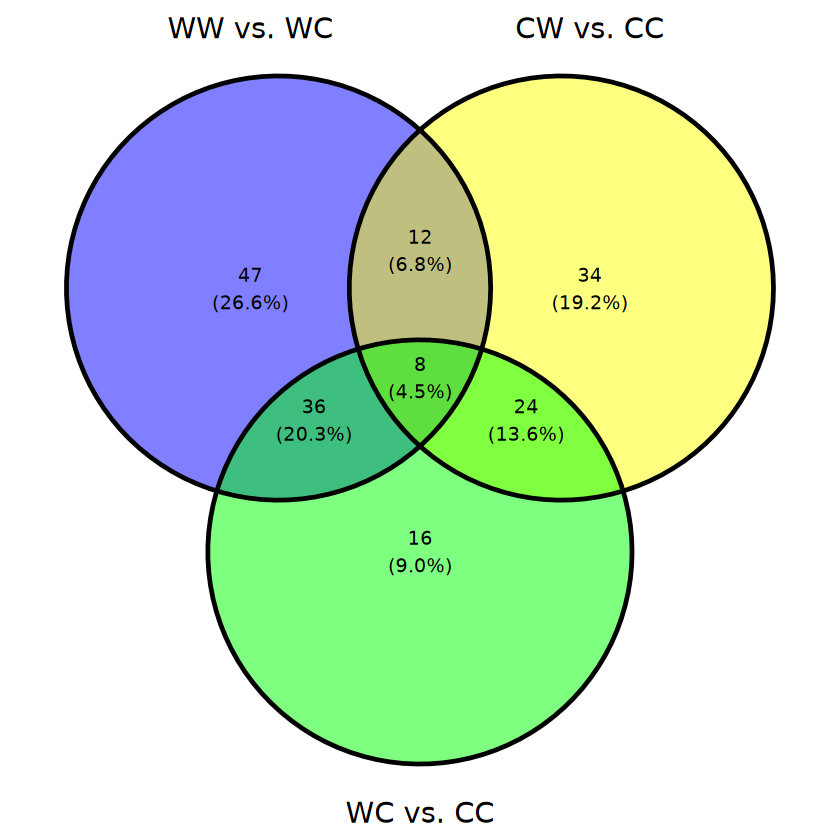

In [7]:
warm <- list(
    'WW vs. WC' = deg_list$wc_ww$Gene,
    'CW vs. CC' = deg_list$cw_cc$Gene,
    'WC vs. CC' = deg_list$wc_cc$Gene
    
)

# Plot
ggvenn(warm)

for frontloading analysis, would only want to look at the DEGs that are unique to WC vs. CC (16) and CW vs. CC (34) or the overlap between the two (24)

#### hypoxia

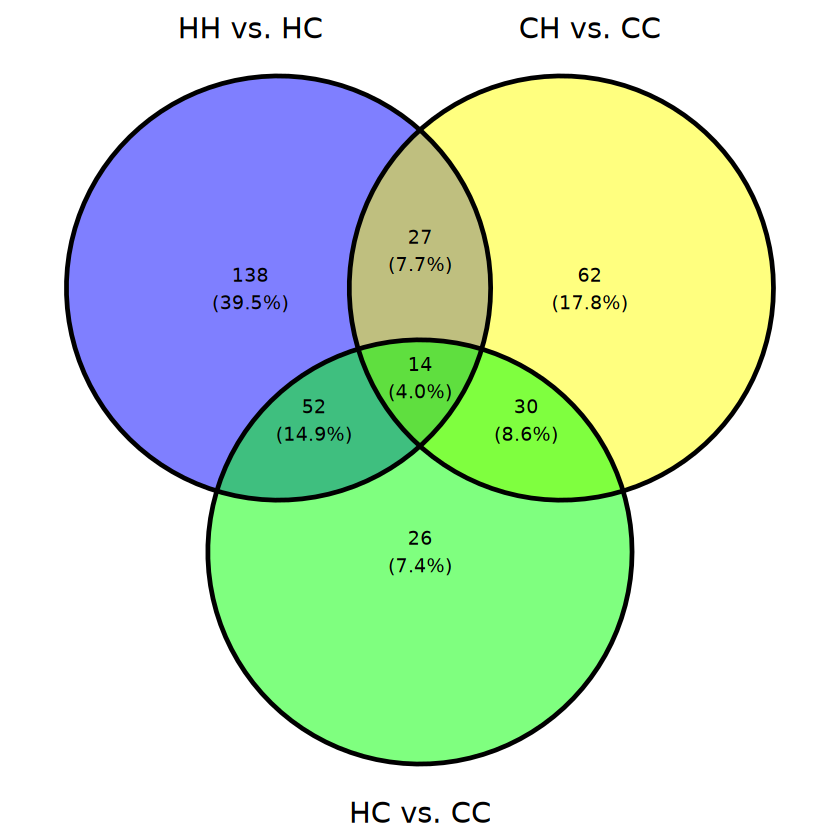

In [11]:
hypoxia <- list(
    'HH vs. HC' = deg_list$hc_hh$Gene,
    'CH vs. CC' = deg_list$ch_cc$Gene,
    'HC vs. CC' = deg_list$hc_cc$Gene
    
)

# Plot
ggvenn(hypoxia)

for frontloading analysis, would only want to look at the DEGs that are unique to HC vs. CC (24) and CH vs. CC (62) or the overlap between the two (30)

#### both

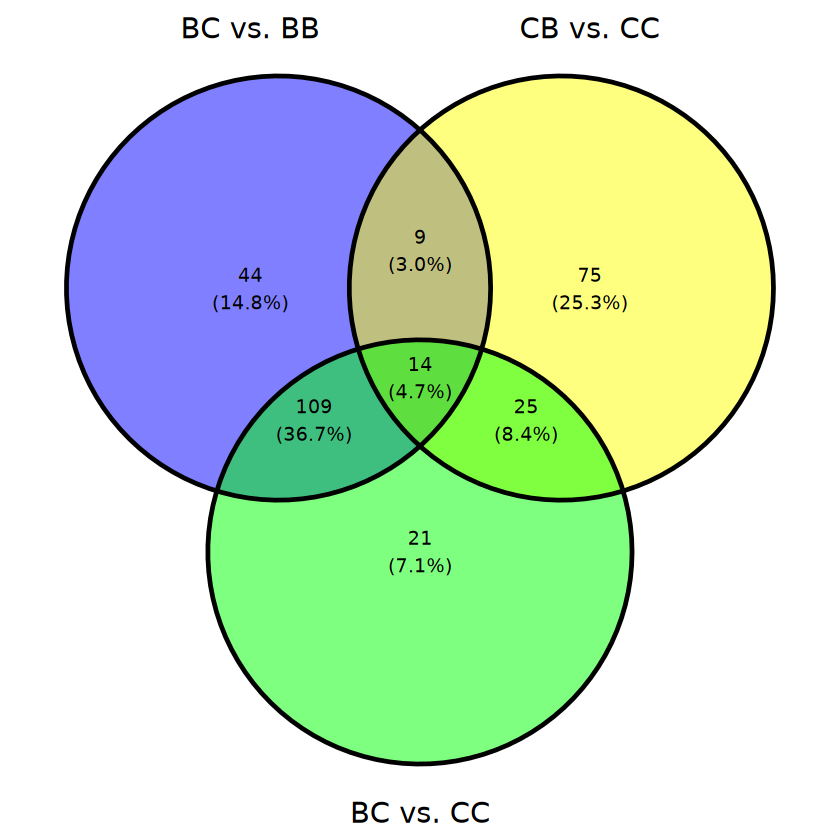

In [12]:
both <- list(
    'BC vs. BB' = deg_list$bc_bb$Gene,
    'CB vs. CC' = deg_list$cb_cc$Gene,
    'BC vs. CC' = deg_list$bc_cc$Gene
    
)

# Plot
ggvenn(both)

for frontloading analysis, would only want to look at the DEGs that are unique to BC vs. CC (21) and CB vs. CC (25) or the overlap between the two (75)

## 3. LFC in unique DEGs from CS vs. CC 
where S is a stressor (warm, hypoxic, or both)

#### warming

In [44]:
# pull out LFC of DEGs in CW vs. CC
cw_cc.deg <- deg_list$cw_cc %>%
select(Gene, log2FoldChange) %>%
rename(cw_cc = log2FoldChange)
dim(cw_cc.deg) # 162 total DEGs

# only unique DEGs 
cw_cc.uniq <- cw_cc.deg %>%
  dplyr::anti_join(deg_list$wc_ww, by = "Gene") # remove DEGs that are shared
dim(cw_cc.uniq) # 119 unique genes

# pull out the unique DEGs in the HC vs. HH comparison
wc_ww.list <- all_list$wc_ww %>% 
dplyr::semi_join(cw_cc.uniq, by = "Gene") %>%
select(Gene, log2FoldChange) %>%
rename(wc_ww = log2FoldChange)
dim(wc_ww.list) # 119 genes

# combine dfs for plotting
warm.df <- merge(cw_cc.uniq, wc_ww.list, by = 'Gene')
head(warm.df)

# actually want to switch the direction of LFC so WC is the 'control'
warm.df2 <- warm.df %>%
mutate(wc_ww = -1 * wc_ww) %>%
rename(ww_wc = wc_ww)
head(warm.df2)

[1] 78  2

[1] 58  2

[1] 58  2

,Gene,cw_cc,wc_ww
,<chr>,<dbl>,<dbl>
1,LOC111099673,-31.18098,-0.14518484
2,LOC111099906,18.07519,1.54519257
3,LOC111099940,-22.89151,-0.03813375
4,LOC111101368,25.46151,5.27057057
5,LOC111101701,-18.26036,0.54490470
6,LOC111102046,22.81510,0.38498086


,Gene,cw_cc,ww_wc
,<chr>,<dbl>,<dbl>
1,LOC111099673,-31.18098,0.14518484
2,LOC111099906,18.07519,-1.54519257
3,LOC111099940,-22.89151,0.03813375
4,LOC111101368,25.46151,-5.27057057
5,LOC111101701,-18.26036,-0.54490470
6,LOC111102046,22.81510,-0.38498086


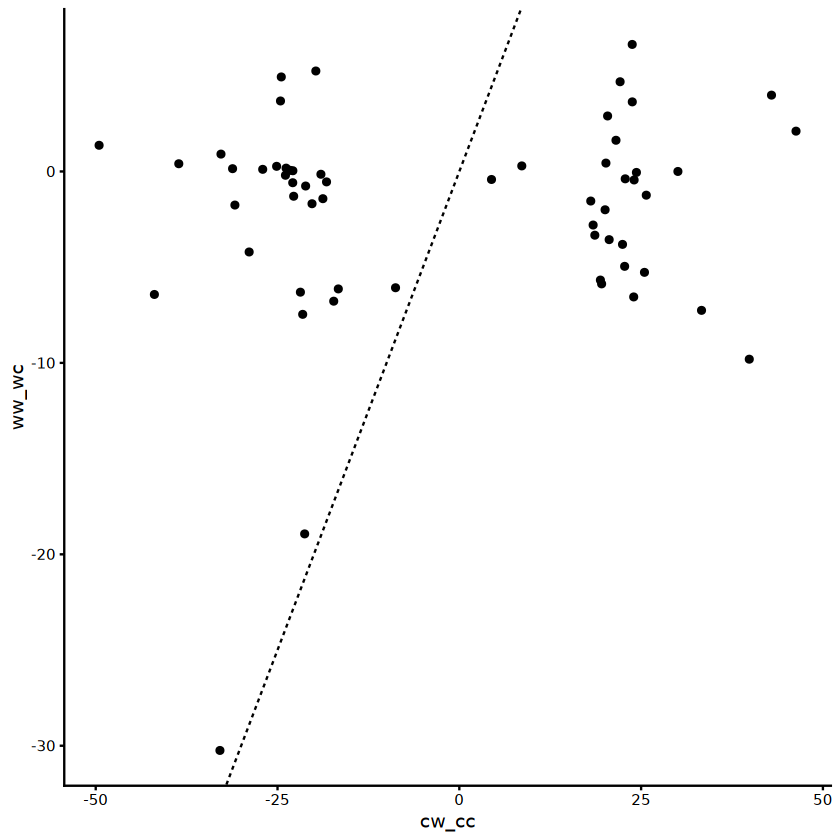

In [49]:
ggplot(warm.df2, aes(x=cw_cc, y=ww_wc)) + 
geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
geom_point() + 
theme_classic()

hmmmmm okay so this looks much closer to those other papers (Collins 2021, Gurr 2022, Barshis 2012) 

clearly have two groups - those that are downregulated in CW vs. CC (left) and those upregulated in CW vs. CC (right)

of the downregulated DEGs in CW vs. CC, you see most have a reduced reaction in WC vs. WW (not *as* downregulated) or actually are upregulated in WC vs. WW

of the upregulated DEGs in CW vs. CC< you see most have a reduced reaction in WC vs. WW (beneath the 1:1 line for upregulation) and then some that are actually downregulated 

#### hypoxia

In [40]:
# pull out LFC of DEGs in CH vs. CC
ch_cc.deg <- deg_list$ch_cc %>%
select(Gene, log2FoldChange) %>%
rename(ch_cc = log2FoldChange)
dim(ch_cc.deg) # 227 total DEGs

# only unique DEGs 
ch_cc.uniq <- ch_cc.deg %>%
  dplyr::anti_join(deg_list$hc_hh, by = "Gene") # remove DEGs that are shared
dim(ch_cc.uniq) # 177 unique genes

# pull out the unique DEGs in the HC vs. HH comparison
hc_hh.list <- all_list$hc_hh %>%
dplyr::semi_join(ch_cc.uniq, by = "Gene") %>%
select(Gene, log2FoldChange) %>%
rename(hc_hh = log2FoldChange)
dim(hc_hh.list) # 177 genes

# combine dfs for plotting
hyp.df <- merge(ch_cc.uniq, hc_hh.list, by = 'Gene')
head(hyp.df)

# actually want to switch the direction of LFC so HC is the 'control'
hyp.df2 <- hyp.df %>%
mutate(hc_hh = -1 * hc_hh) %>%
rename(hh_hc = hc_hh)
head(hyp.df2)

[1] 133   2

[1] 92  2

[1] 92  2

,Gene,ch_cc,hc_hh
,<chr>,<dbl>,<dbl>
1,LOC111099607,16.66051,-7.316349
2,LOC111099630,21.54066,15.810051
3,LOC111099906,18.45739,4.270486
4,LOC111100493,17.55127,-2.764086
5,LOC111101171,-19.02858,7.870848
6,LOC111101676,-18.07575,0.000000


,Gene,ch_cc,hh_hc
,<chr>,<dbl>,<dbl>
1,LOC111099607,16.66051,7.316349
2,LOC111099630,21.54066,-15.810051
3,LOC111099906,18.45739,-4.270486
4,LOC111100493,17.55127,2.764086
5,LOC111101171,-19.02858,-7.870848
6,LOC111101676,-18.07575,0.000000


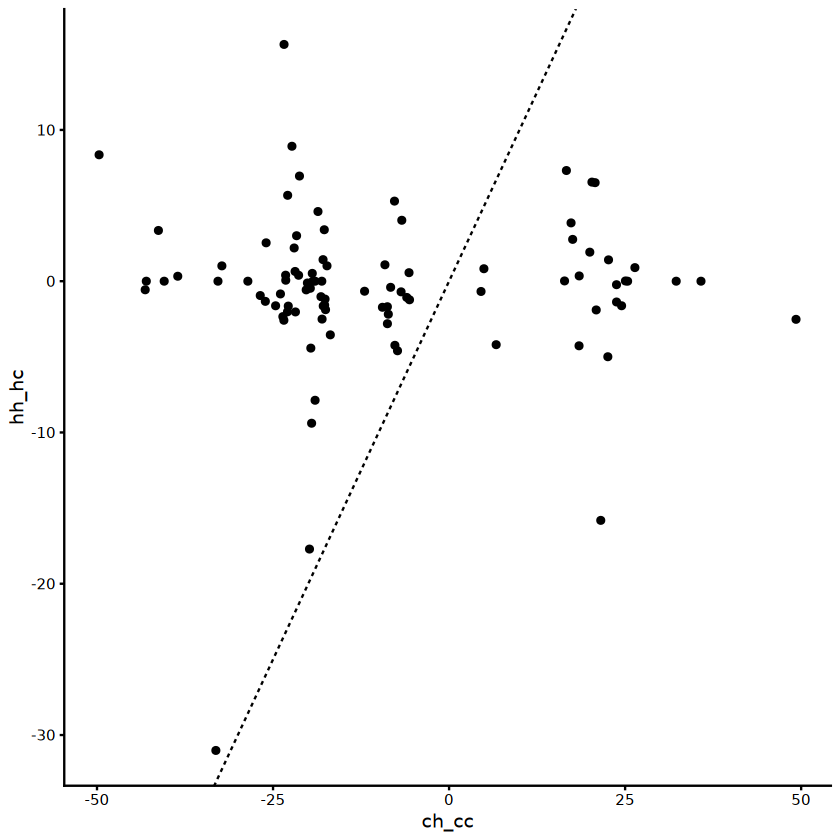

In [48]:
ggplot(hyp.df2, aes(x=ch_cc, y=hh_hc)) + 
geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
geom_point() +
theme_classic()

ah okay so - DEGs in CH vs. CC have HUGE LFCs, whereas the same genes in HC vs. HH have much smaller LFCs - they're almost not even comparable?? 

#### both

In [45]:
# pull out LFC of DEGs in CB vs. CC
cb_cc.deg <- deg_list$cb_cc %>%
select(Gene, log2FoldChange) %>%
rename(cb_cc = log2FoldChange)
dim(cb_cc.deg) # 217 total DEGs

# only unique DEGs 
cb_cc.uniq <- cb_cc.deg %>%
  dplyr::anti_join(deg_list$bc_bb, by = "Gene") # remove DEGs that are shared
dim(cb_cc.uniq) # 190 unique genes

# pull out the unique DEGs in the HC vs. HH comparison
bc_bb.list <- all_list$bc_bb %>%
dplyr::semi_join(cb_cc.uniq, by = "Gene") %>%
select(Gene, log2FoldChange) %>%
rename(bc_bb = log2FoldChange)
dim(bc_bb.list) # 190 genes

# combine dfs for plotting
both.df <- merge(cb_cc.uniq, bc_bb.list, by = 'Gene')
head(both.df)

# actually want to switch the direction of LFC so BC is the 'control'
both.df2 <- both.df %>%
mutate(bc_bb = -1 * bc_bb) %>%
rename(bb_bc = bc_bb)
head(both.df2)

[1] 123   2

[1] 100   2

[1] 100   2

,Gene,cb_cc,bc_bb
,<chr>,<dbl>,<dbl>
1,LOC111099607,18.41739,-1.4963797
2,LOC111099858,-22.06744,0.5737369
3,LOC111099906,14.84458,0.2378623
4,LOC111099988,25.90624,20.8141555
5,LOC111100107,-24.51526,-9.0289485
6,LOC111100493,21.92412,0.4020221


,Gene,cb_cc,bb_bc
,<chr>,<dbl>,<dbl>
1,LOC111099607,18.41739,1.4963797
2,LOC111099858,-22.06744,-0.5737369
3,LOC111099906,14.84458,-0.2378623
4,LOC111099988,25.90624,-20.8141555
5,LOC111100107,-24.51526,9.0289485
6,LOC111100493,21.92412,-0.4020221


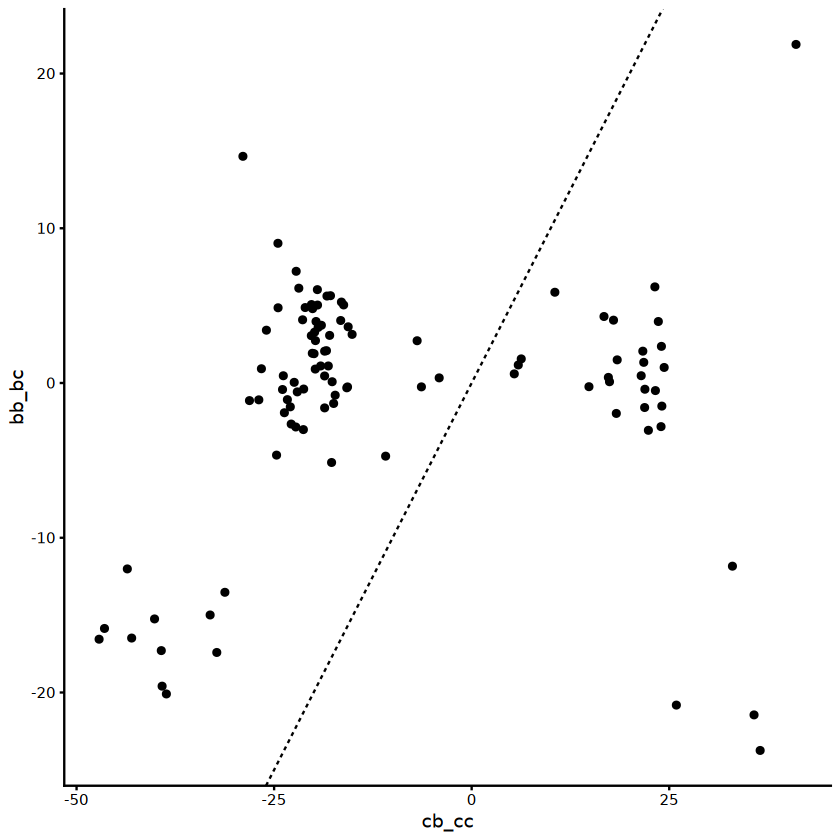

In [47]:
ggplot(both.df2, aes(x=cb_cc, y=bb_bc)) + 
geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
geom_point() +
theme_classic()

more 'movement' here - the DEGs in CB vs. CC tend to be upregulated in BC vs. BB (above 0 on the yaxis)

## 4. convert LFC to raw FC
based on Collins et al 2020:
- up-regulated genes = 2^LFC
- down-regulated genes = 1/2^LFC

### step 1: pull consititutive fold up- and down-regulation

separate unique DEGs from CS vs. CC (where S is H, W, or B) into up or down regulated

In [50]:
# make list of dfs with unique naive stress genes from step 3
unique.dfs <- list(hyp.df2 = hyp.df2, warm.df2 = warm.df2, both.df2 = both.df2)
names(unique.dfs)

[1] "hyp.df2"  "warm.df2" "both.df2"

In [78]:
# initialize list for raw fold change dfs
raw_list <- list()

# for loop for deg_list
for (nm in names(unique.dfs)) {

  df <- unique.dfs[[nm]]

 UP.df <- df %>%
    dplyr::filter(.[[2]] > 0) %>%
    dplyr::mutate(
      dplyr::across(
        2:3,
        ~ 2^.x,
        .names = "{.col}_raw"
      )
    )

  DOWN.df <- df %>%
    dplyr::filter(.[[2]] < 0) %>%
    dplyr::mutate(
      dplyr::across(
        2:3,
        ~ 2^.x,
        .names = "{.col}_raw"
      )
    )

  raw_list[[paste0(nm, "_UP")]]   <- UP.df
  raw_list[[paste0(nm, "_DOWN")]] <- DOWN.df
    
}

names(raw_list)

[1] "hyp.df2_UP"    "hyp.df2_DOWN"  "warm.df2_UP"   "warm.df2_DOWN"
[5] "both.df2_UP"   "both.df2_DOWN"

### step 2: add "control ratio"

which will be our x-axis - constitutive fold regulation

SC vs. CC (stress-primed vs. naive in control conditions; phase 1 stress or control in phase 2 control conditions) - so just adding the lfc and raw fc to our existing dfs

In [74]:
add_lfc_to_raw <- function(raw_df, lfc_df, lfc_name) {

  lfc_df %>%
    dplyr::filter(Gene %in% raw_df$Gene) %>%
    dplyr::select(Gene, log2FoldChange) %>%
    dplyr::rename(!!lfc_name := log2FoldChange) %>%
    dplyr::mutate(!!paste0(lfc_name, "_raw") := 2^.data[[lfc_name]]) %>%
    dplyr::right_join(raw_df, by = "Gene")
}

In [75]:
map_tbl <- tibble::tribble(
  ~raw_name,       ~lfc_name,
  "hyp.df2",       "hc_cc",
  "warm.df2",      "wc_cc",
  "both.df2",      "bc_cc"
)

In [79]:
for (i in seq_len(nrow(map_tbl))) {

  raw_base <- map_tbl$raw_name[i]
  lfc_name <- map_tbl$lfc_name[i]

  for (dir in c("UP", "DOWN")) {

    raw_key <- paste0(raw_base, "_", dir)

    raw_list[[raw_key]] <- add_lfc_to_raw(
      raw_df  = raw_list[[raw_key]],
      lfc_df  = all_list[[lfc_name]],
      lfc_name = lfc_name
    )
  }
}


In [81]:
head(raw_list$hyp.df2_UP)

,Gene,hc_cc,hc_cc_raw,ch_cc,hh_hc,ch_cc_raw,hh_hc_raw
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111107221,17.5320314,189525.3672,19.985104,1.9195415,1.037805e+06,3.78302800
2,LOC111099906,19.2546139,625484.2020,18.457389,-4.2704855,3.599380e+05,0.05181503
3,LOC111123476,15.4911876,46058.7493,17.323316,3.8539968,1.639977e+05,14.46001160
4,LOC111135814,0.4704068,1.3855,4.538082,-0.6790699,2.323265e+01,0.62456780
5,LOC111136642,15.0902202,34882.6066,20.740594,6.5132906,1.752027e+06,91.34732687
6,LOC111132298,23.2383984,9895892.5973,18.479403,0.3480918,3.654725e+05,1.27287591


### step 3: calculate stress response ratio
ratio of stress-primed response and naive response in stress

( (SS vs. SC) / (CS vs. CC) )

this will be our y-axis

In [84]:
### HYP

##### UP
raw_list$hyp.df2_UP <- raw_list$hyp.df2_UP %>% 
mutate(y.axis = hh_hc_raw / ch_cc_raw)

##### DOWN
raw_list$hyp.df2_DOWN <- raw_list$hyp.df2_DOWN %>% 
mutate(y.axis = hh_hc_raw / ch_cc_raw)

In [85]:
### WARM

##### UP
raw_list$warm.df2_UP <- raw_list$warm.df2_UP %>% 
mutate(y.axis = ww_wc_raw / cw_cc_raw)

##### DOWN
raw_list$warm.df2_DOWN <- raw_list$warm.df2_DOWN %>% 
mutate(y.axis = ww_wc_raw / cw_cc_raw)

In [86]:
### BOTH

##### UP
raw_list$both.df2_UP <- raw_list$both.df2_UP %>% 
mutate(y.axis = bb_bc_raw / cb_cc_raw)

##### DOWN
raw_list$both.df2_DOWN <- raw_list$both.df2_DOWN %>% 
mutate(y.axis = bb_bc_raw / cb_cc_raw)

### step 4: plot!

In [105]:
## hyp UP
hyp_up <- ggplot(raw_list$hyp.df2_UP, aes(x = hc_cc_raw, y = y.axis)) +
geom_point() +
labs(y = 'Stress Response Ratio (HH vs. HC / CH vs. CC)',
    x = 'Constitutive fold upregulation (HC vs. CC)') +
geom_hline(yintercept = 1) +
geom_vline(xintercept = 1) +
theme_classic()

In [104]:
## hyp UP
hyp_down <- ggplot(raw_list$hyp.df2_DOWN, aes(x = hc_cc_raw, y = y.axis)) +
geom_point() +
labs(y = 'Stress Response Ratio (HH vs. HC / CH vs. CC)',
    x = 'Constitutive fold downregulation (HC vs. CC)') +
geom_hline(yintercept = 1) +
geom_vline(xintercept = 1) +
theme_classic()

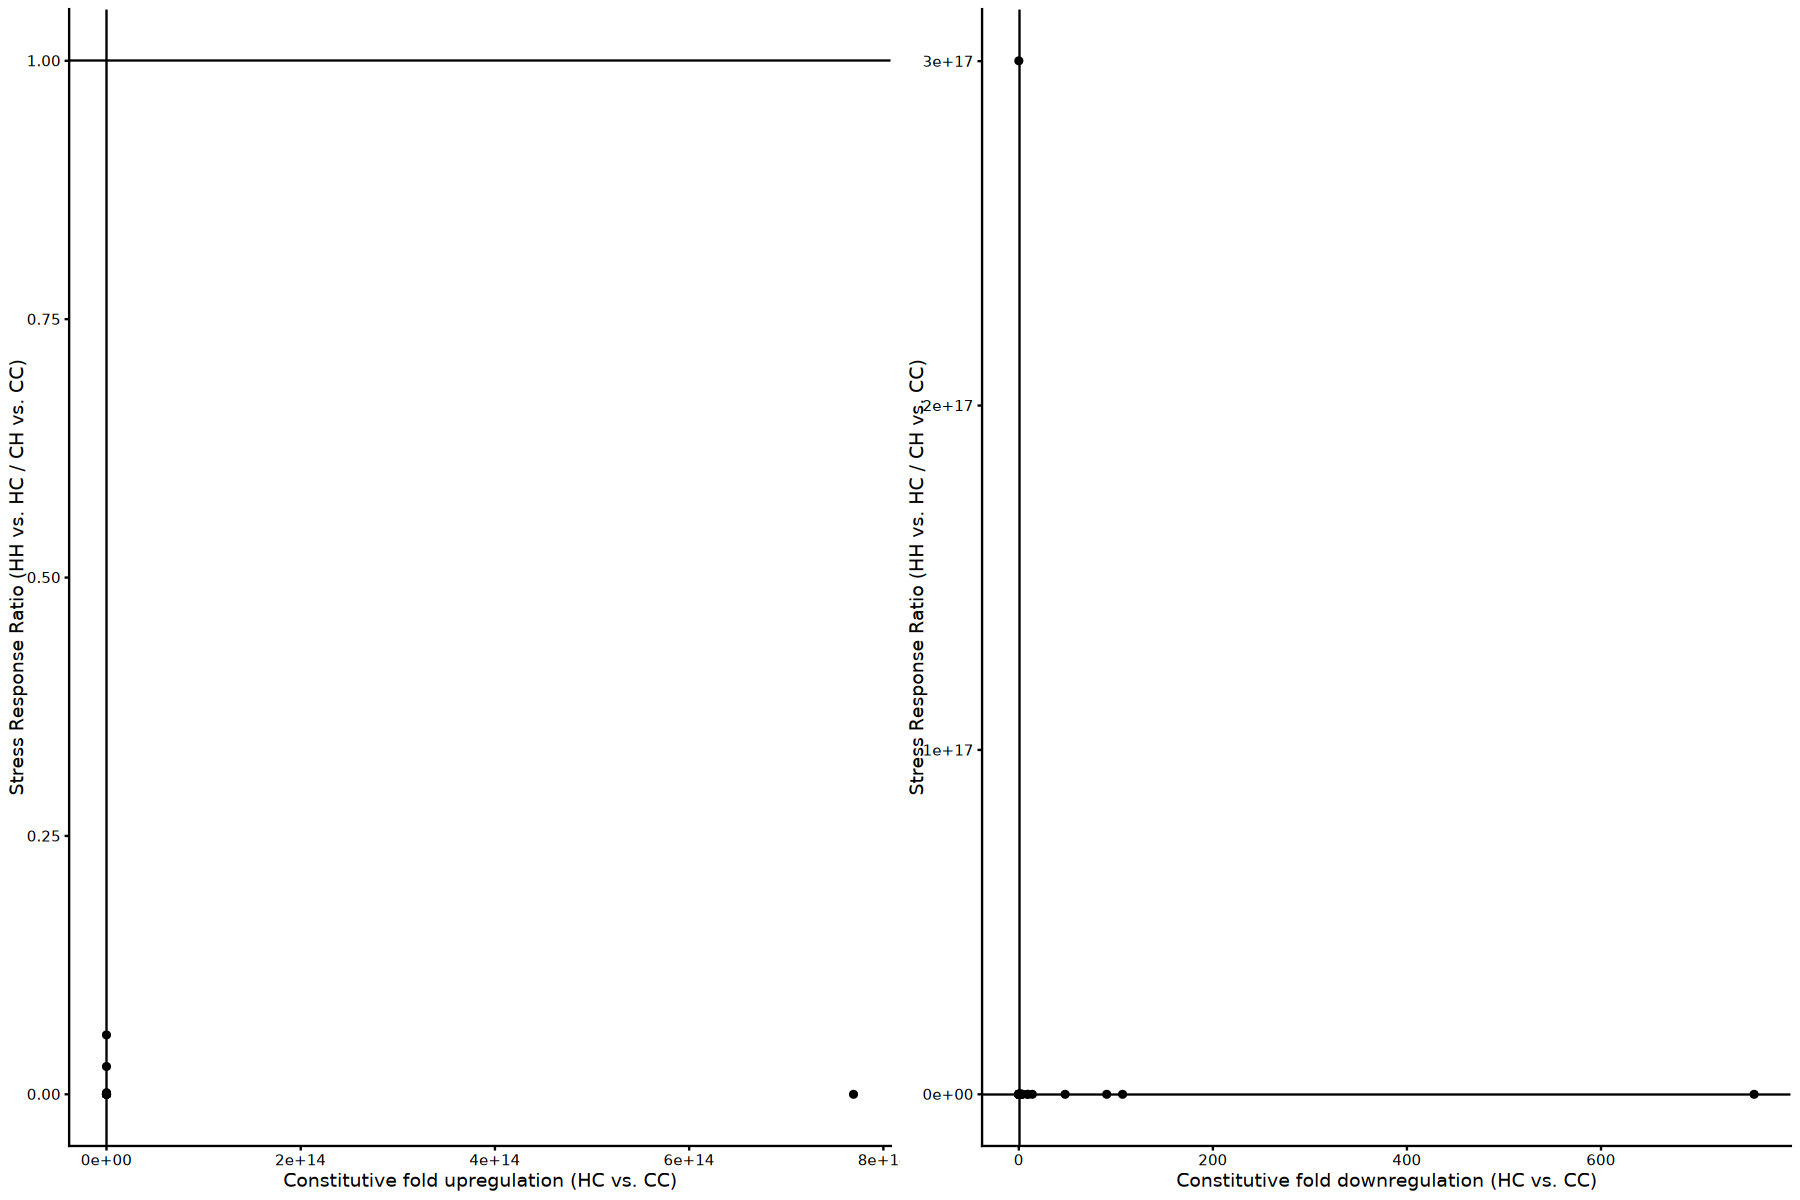

In [108]:
options(repr.plot.width=15, repr.plot.height=10)

plot_grid(hyp_up, hyp_down)